In [1]:
import pandas as pd
import numpy as np

# Checkpoint 1: Data Cleaning 1 #


***

In [2]:
# Creating the companies dataframe
companies = pd.read_csv('companies.txt',sep="\t",encoding='ISO-8859-1')


In [3]:
#Analysing the data
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


#Importing data/Creating dataFrame  from companies.txt 

In [5]:
companies = pd.read_csv('companies.txt',sep="\t", encoding ='ISO-8859-1')


In [6]:
#Analysing the companies data
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [7]:
# Removing the special characters in Permalink and name column.
# referred the stackoverflow link mentioned in the problem description.

companies['permalink']=companies[['permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
companies['name']=companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')

In [8]:
##Importing data/Creating dataFrame  from rounds2.csv 

In [9]:
rounds2 = pd.read_csv("rounds2.csv", encoding ='ISO-8859-1')

In [10]:
#Analysing the data
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [11]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [12]:
# Removing the special characters in company_permalink and funding_round_permalink column

rounds2['company_permalink']=rounds2[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
rounds2['funding_round_permalink']=rounds2[['funding_round_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

In [13]:
# Converting the columns ( company_permalink in round2 and permalink & name in companies) to lowercase to avoid duplicacy due to different case
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())

In [14]:
# doing the same for companies permalink
companies.permalink = companies.permalink.apply(lambda x: x.lower())
companies['name']=companies['name'].str.lower()

# Table 1.1: Understand the Data Set #
**How many unique companies are present in rounds2?**

**How many unique companies are present in companies?**

**In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.**

**Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N**

**Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.How many observations are present in master_frame?**

In [15]:
len(rounds2.company_permalink.unique())

66368

Question. How many unique companies are present in rounds2? 
Answer: **66368**

In [16]:
len(companies.name.unique())

66038

Question. How many unique companies are present in companies file?
Answer: **66038**

**In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.**

**Also, checked that the permalink is unique ID. But it seems that for the duplicate company names in the name column, the** **permalink has been manipulated as it could not be duplicate. Hence it seems that company name should be unique**

In [17]:
companies.loc[~rounds2.company_permalink.isin(companies.permalink)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


Question. Are there any companies in the rounds2 file which are not present in companies?
Answer: **No**

In [18]:
#Merging dataframes companies and rounds2
master_frame = pd.merge(rounds2,companies, left_on="company_permalink", right_on="permalink", how='left')

In [19]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [20]:
## Creating a backup dataframe to calculate the percent of data removed from the dataframe
master_frame_bkp=master_frame.copy()
master_frame_bkp.shape

(114949, 16)

# Data Cleaning#

In [21]:
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

**Question:** Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.
Name the merged frame master_frame.
How many observations are present in master_frame ?

**Answer:** 
There are 114949 rows, 16 columns.
We also checked if there are any null values and found 'funding round code' columns with maximum null entries with 72.91% null values. Also the companies with status closed are plenty. We will be removing such rows/null values to clean this dataframe for the analysis.

In [22]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [23]:
# We are removing those entries where status is closed as there is no investment going to happen for these companies.
master_frame = master_frame[master_frame['status']!='closed']

In [24]:
master_frame[master_frame['raised_amount_usd'].isna()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,NaN,/organization/1,one inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
17,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,/organization/1-4-all,1-4 all,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,NaN,/organization/1-618-technology,1.618 technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013
19,/organization/1-800-dentist,/funding-round/5274aacc211163fc7c86539ce94bbacc,undisclosed,NaN,19-08-2010,NaN,/organization/1-800-dentist,1-800-dentist,http://www.1800dentist.com,Health and Wellness,operating,USA,CA,Los Angeles,Los Angeles,01-01-1986
33,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN,/organization/1000lookz,1000lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008
40,/organization/1000museums-com,/funding-round/6dcccfea326e6add866bf67aafb0a7df,convertible_note,NaN,01-12-2014,NaN,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008
42,/organization/1000museums-com,/funding-round/adf2f3272af9f552b87e01f10f0b9234,venture,NaN,01-02-2014,NaN,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008
51,/organization/1006-tv,/funding-round/a3631227d5232aa8c2303f252c4f1f87,angel,NaN,01-01-2011,NaN,/organization/1006-tv,1006.tv,http://www.1006.tv/,Games|Media,operating,CHN,22,Beijing,Beijing,01-01-2009


In [25]:
master_frame.shape

(106224, 16)

In [26]:
master_frame[master_frame.status == 'closed']

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [27]:
# Removing all the rows where 'raised_amount_usd' is null. This will impact the average and other calculations.
master_frame = master_frame[pd.notnull(master_frame['raised_amount_usd'])]

In [28]:
master_frame.shape

(87903, 16)

In [29]:
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.21
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.31
category_list               0.72
status                      0.00
country_code                5.26
state_code                  7.10
region                      6.50
city                        6.50
founded_at                 15.82
dtype: float64

In [30]:
len(master_frame.name.unique())

48814

In [31]:
# Converting the amounts of 'raised_amount_usd' column from $ to million $ for easier calculation and understandability.
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].apply(lambda val: round(val/1000000,3))

In [32]:
# Renaming the column for obvious reason
master_frame=master_frame.rename(columns = {'raised_amount_usd':'raised_amount_mil_usd'})

In [33]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.700,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.407,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,0.041,/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,0.043,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1.700,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


# Checkpoint 2: Funding Type Analysis #

Table 2.1: Average Values of Investments for Each of these Funding Types
Average funding amount of venture type
Average funding amount of angel type
Average funding amount of seed type
Average funding amount of private equity type
Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it?

In [34]:
master_frame.groupby('funding_round_type')['raised_amount_mil_usd'].mean()

funding_round_type
angel                      0.979917
convertible_note           1.479851
debt_financing            17.774072
equity_crowdfunding        0.519852
grant                      4.154310
non_equity_assistance      0.402853
post_ipo_debt            174.609345
post_ipo_equity           84.233854
private_equity            75.575805
product_crowdfunding       1.411511
secondary_market          91.439808
seed                       0.738591
undisclosed               18.837079
venture                   11.895604
Name: raised_amount_mil_usd, dtype: float64

In [35]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.700,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.407,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,0.041,/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,0.043,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1.700,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [36]:
master_frame[master_frame['country_code'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.407,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
32,/organization/1000chi,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,NaN,01-04-2010,43.924,/organization/1000chi,beijing 1000chi software technology,http://www.1000chi.com/,Mobile,operating,NaN,NaN,NaN,NaN,01-01-2008
66,/organization/10k-2,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,NaN,04-09-2015,0.100,/organization/10k-2,beans around,http://beansaround.com/,Coffee|Delivery|Subscription Service,operating,NaN,NaN,NaN,NaN,01-04-2015
95,/organization/1234enter,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,NaN,22-11-2013,0.150,/organization/1234enter,1234enter,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012
96,/organization/1234enter,/funding-round/ee6f9dea78c9a0697a500098a854564d,seed,NaN,01-09-2012,0.500,/organization/1234enter,1234enter,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012
100,/organization/123greetings,/funding-round/5dd1821a92088ff96b467eb16431731a,venture,NaN,23-07-2015,5.400,/organization/123greetings,123greetings,http://www.123greetings.com/,Internet,operating,NaN,NaN,NaN,NaN,01-05-1997
127,/organization/15minutesnow,/funding-round/9352dd0999084c880e8f62cbe3a2095e,seed,NaN,10-05-2011,0.200,/organization/15minutesnow,15minutesnow,http://15minutesnow.com,Games,operating,NaN,NaN,NaN,NaN,19-04-2011
133,/organization/17-media,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,10.000,/organization/17-media,17 media,http://17.media,NaN,operating,NaN,NaN,NaN,NaN,15-07-2015
145,/organization/1800diapers,/funding-round/5e2b8cd8ad0dcdff961fd09dee78d487,venture,B,04-12-2007,7.000,/organization/1800diapers,1800diapers,NaN,Baby Accessories|Kids,operating,NaN,NaN,NaN,NaN,NaN
173,/organization/1lay,/funding-round/0008af0992808995558ed19069bc14e6,seed,NaN,02-11-2015,0.210,/organization/1lay,1lay,http://1lay.com,Mobile|Mobile Devices|Mobile Security|Security...,operating,NaN,NaN,NaN,NaN,18-07-2013


In [37]:
master_frame.category_list.isna().count()

87903

In [38]:
master_frame.shape

(87903, 16)

In [39]:
# Removing null value rows for the country code column. The analysis will also be based in countries.
master_frame = master_frame[pd.notnull(master_frame['country_code'])]

In [40]:
master_frame.shape

(83277, 16)

In [41]:
len(master_frame.name.unique())

45289

In [42]:
master_frame.groupby('funding_round_type')['raised_amount_mil_usd'].mean()

funding_round_type
angel                      0.994756
convertible_note           1.340013
debt_financing            17.891010
equity_crowdfunding        0.511266
grant                      4.286176
non_equity_assistance      0.460610
post_ipo_debt            175.469739
post_ipo_equity           67.093605
private_equity            75.797196
product_crowdfunding       1.521047
secondary_market          94.089400
seed                       0.763097
undisclosed               16.018211
venture                   11.903153
Name: raised_amount_mil_usd, dtype: float64

1. Average funding amount of venture type
    **11.90 Million Dollars**
2. Average funding amount of angel type
    **0.99 Million Dollars**
3. Average funding amount of seed type
    **0.76 Million Dollars**
4. Average funding amount of private equity type
    **75.80 Million Dollars**

In [43]:
master_frame.groupby('funding_round_type')['raised_amount_mil_usd'].mean().between(5.0,15.0,inclusive=True)

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_mil_usd, dtype: bool

***The best investment type is Venture Type, we will proceed ahead with that only for further analysis.***


In [44]:
#Creating a new dataframe with name 'master_frame_vent' for the same.
master_frame_vent = master_frame[master_frame.funding_round_type == 'venture']

# Checkpoint 3: Country Analysis #

***

In [45]:
master_frame_vent.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         19874
funded_at                      0
raised_amount_mil_usd          0
permalink                      0
name                           0
homepage_url                1983
category_list                201
status                         0
country_code                   0
state_code                   696
region                       549
city                         549
founded_at                  7506
dtype: int64

In [46]:
#creating a data frame named top9 with the top nine countries 
top9 = master_frame_vent.groupby('country_code',as_index=False)['raised_amount_mil_usd'].sum().sort_values(by = ['raised_amount_mil_usd'],ascending=False).head(9)
top9['Rank'] = range(1,10)
top9.set_index(['Rank'],inplace = True)

In [47]:
master_frame_vent

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1.700,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8.900,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5.000,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4.000,/organization/10-minutes-with,10 minutes with,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2.520,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,0.266,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008


In [48]:
top9

,country_code,raised_amount_mil_usd
Rank,,
1,USA,399935.179
2,CHN,39101.773
3,GBR,18241.345
4,IND,14050.604
5,CAN,8825.477
6,FRA,6775.039
7,ISR,6503.020
8,DEU,6061.141
9,JPN,3242.031


  **1. Top English speaking country = USA**
  **2. Second English speaking country = GBR**
  **3. Third English speaking country = IND**

In [49]:
len(top9.country_code.unique())

9

In [50]:
master_frame.shape

(83277, 16)

# Checkpoint 4: Sector Analysis 1 #

In [51]:
mapping=pd.read_csv('mapping.csv')

In [52]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [53]:
mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [54]:
# Creating containing the first category as it the primary category.
prim_sector = master_frame_vent['category_list'].str.split('|',n=1,expand=True)

In [55]:
master_frame_vent.shape

(44949, 16)

In [56]:
prim_sector.shape

(44949, 2)

In [57]:
prim_sector

,0,1
0,Media,None
4,Curated Web,None
8,Biotechnology,None
10,Analytics,None
11,Analytics,None
12,Analytics,None
22,Apps,Cable|Distribution|Software
28,Education,None
34,Curated Web,None
38,Curated Web,None


In [58]:
# Filling the 'Primary_Sector' column with the extrated category values.
master_frame_vent['Primary_Sector']=prim_sector[0]
master_frame_vent

C:\Users\maddih\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1.700,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8.900,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5.000,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4.000,/organization/10-minutes-with,10 minutes with,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,Education
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2.520,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,Curated Web
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,0.266,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,Curated Web


In [59]:
type(prim_sector)

pandas.core.frame.DataFrame

In [60]:
# Analysied the mappings data frame. Found the Replacing 0 in the category list entries where it shuls
mapping['category_list']=mapping['category_list'].str.replace('0','na')

In [61]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [62]:
# Using melt function from Pandas library. Using 'category_list' as the column in front of which we will need to get the columns containing 1.
# This actually prints all the column names containing 1s and 0s also.
melted=pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [63]:
# the conlumn names can be seen here
melted.head(30)

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
5,Active Lifestyle,Automotive & Sports,0
6,Ad Targeting,Automotive & Sports,0
7,Advanced Materials,Automotive & Sports,0
8,Adventure Travel,Automotive & Sports,1
9,Advertising,Automotive & Sports,0


In [64]:
# We need only those column entries which have 1 in the respective cells.
melted=melted[melted.value==1]
melted

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [65]:
# Changing column names
melted=melted.rename(columns={'category_list':'Primary_Sector','variable':'main_sector'})

In [66]:
# Dropping the value column as it is not necessary.
melted=melted.drop('value',axis=1)

In [67]:
# Creating a merged Dataframe master_FT
# Using inner join to gather the entries from 'master_frame_vent' and 'melted' dataframes based on their Primary Sector values.
# Using left join, there were 176 rows having null values for 'main sector'. To avoid this, we have decided to go with inner join.
master_FT = pd.merge(master_frame_vent,melted,on='Primary_Sector',how='inner')
master_FT

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.800,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18.000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.000,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment
5,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,0.650,/organization/audiosocket,audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,Media,Entertainment
6,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,0.750,/organization/audiosocket,audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,Media,Entertainment
7,/organization/audiosocket,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,NaN,15-02-2012,1.582,/organization/audiosocket,audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,Media,Entertainment
8,/organization/babble,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,A,05-02-2009,2.000,/organization/babble,babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,Media,Entertainment
9,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,12-05-2009,1.250,/organization/babble,babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,Media,Entertainment


In [68]:
master_FT.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                          690
Blanks                                       201
Cleantech / Semiconductors                  9274
Entertainment                               2521
Health                                      3742
Manufacturing                               3075
News, Search and Messaging                  5483
Others                                     10680
Social, Finance, Analytics, Advertising     9107
Name: main_sector, dtype: int64

In [69]:
#We are removing Blank main sectors as those are having no part in our analysis.
#We don't have visibility in which sector these investments are done, 
#so simply making count of them won't help us much in deciding proper Sector.
master_FT=master_FT[master_FT.main_sector!='Blanks']

In [70]:
#Now there are 8 main sectors
master_FT.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                          690
Cleantech / Semiconductors                  9274
Entertainment                               2521
Health                                      3742
Manufacturing                               3075
News, Search and Messaging                  5483
Others                                     10680
Social, Finance, Analytics, Advertising     9107
Name: main_sector, dtype: int64

In [71]:
master_FT.shape

(44572, 18)

In [72]:
master_frame_vent.shape

(44949, 17)

# Checkpoint 5: Sector Analysis 2 #

In [73]:
# Copying only those company details for which investemnts have been been between 5 to 15 milions in a new Dataframe 'master_FT_5M_15M'. 
master_FT_5M_15M = master_FT[master_FT['raised_amount_mil_usd'].between(5.0,15.0,inclusive=True)]

In [74]:
master_FT_5M_15M.shape

(14756, 18)

#adding required fields to D1 dataframe as  per Checkpoint 5: Sector Analysis 2
#count_of_invest is total number (or count) of investments for each main sector
#sum_of_invest is total amount invested in each main sector

In [75]:
# Creating D1, D2 and D3 Datarames as per the mentioned requirements in Probelm Description
D1 = master_FT_5M_15M[master_FT_5M_15M['country_code']=='USA']
D1 = D1.assign(count_of_invest =D1.groupby('main_sector')['main_sector'].transform('count'))
D1 = D1.assign(sum_of_invest =D1.groupby('main_sector')['raised_amount_mil_usd'].transform('sum'))
D1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.000,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,531,4602.749
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5.000,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,531,4602.749
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5.000,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,531,4602.749
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5.000,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,531,4602.749
30,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5.000,/organization/mediabong,mediabong,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,Media,Entertainment,531,4602.749
33,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12.500,/organization/newscorporation,news corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,Media,Entertainment,531,4602.749
34,/organization/nokeena,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9.400,/organization/nokeena,ankeena networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment,531,4602.749
36,/organization/nokeena,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6.500,/organization/nokeena,ankeena networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment,531,4602.749
47,/organization/vadio,/funding-round/e1570c5060bf30b9972a2b0dc0562b02,venture,A,12-05-2015,7.500,/organization/vadio,vadio,http://vadio.com,Media|Mobile|Video,operating,USA,OR,"Portland, Oregon",Portland,NaN,Media,Entertainment,531,4602.749
77,/organization/abilto,/funding-round/3493aef8ac2dd0e24ebe66801dc28fde,venture,B,18-03-2014,6.000,/organization/abilto,abilto,http://www.abilto.com,Curated Web|Health and Wellness|Health Care|In...,operating,USA,NY,New York City,New York,01-01-2008,Curated Web,"News, Search and Messaging",1468,12996.910


In [76]:
D2 = master_FT_5M_15M[master_FT_5M_15M['country_code']=='GBR']
D2 = D2.assign(count_of_invest =D2.groupby('main_sector')['main_sector'].transform('count'))
D2 = D2.assign(sum_of_invest =D2.groupby('main_sector')['raised_amount_mil_usd'].transform('sum'))
D2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,53,463.516
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.800,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,53,463.516
119,/organization/azimo,/funding-round/5eb768935cf9c60b402944b0f476baae,venture,A,11-03-2014,10.000,/organization/azimo,azimo,http://azimo.com,Curated Web|Finance Technology|Financial Servi...,operating,GBR,H9,London,London,29-10-2012,Curated Web,"News, Search and Messaging",66,558.500
130,/organization/basekit-platform,/funding-round/8252cd70860ec66a1c7d13b6a2519dc6,venture,NaN,13-05-2014,7.000,/organization/basekit-platform,basekit,http://www.basekit.com,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,01-01-2008,Curated Web,"News, Search and Messaging",66,558.500
131,/organization/basekit-platform,/funding-round/9ceb098a822fb971db490b23c1067336,venture,NaN,03-02-2014,6.819,/organization/basekit-platform,basekit,http://www.basekit.com,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,01-01-2008,Curated Web,"News, Search and Messaging",66,558.500
132,/organization/basekit-platform,/funding-round/e4643bd0876a25cb878627de50d09fa0,venture,NaN,29-03-2011,6.500,/organization/basekit-platform,basekit,http://www.basekit.com,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,01-01-2008,Curated Web,"News, Search and Messaging",66,558.500
246,/organization/clickandbuy,/funding-round/e6b6e25cc1b4fe83f50b25edb81c62e2,venture,C,01-11-2006,6.378,/organization/clickandbuy,clickandbuy,http://www.clickandbuy.com,Curated Web|Payments,acquired,GBR,H9,London,London,01-03-2000,Curated Web,"News, Search and Messaging",66,558.500
371,/organization/famecount,/funding-round/f9e03800d455fd03294b3978c4ca84da,venture,NaN,11-11-2014,7.464,/organization/famecount,starcount,http://www.starcount.com/,Curated Web,operating,GBR,E2,London,Brighton,01-01-2010,Curated Web,"News, Search and Messaging",66,558.500
642,/organization/mysupermarket,/funding-round/20a3de0a131d495657586a2734b95adf,venture,C,13-10-2010,7.400,/organization/mysupermarket,mysupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,Curated Web,"News, Search and Messaging",66,558.500
643,/organization/mysupermarket,/funding-round/4e220e601ed65a5d6ab04f3cb9717214,venture,A,08-05-2007,6.000,/organization/mysupermarket,mysupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,Curated Web,"News, Search and Messaging",66,558.500


In [77]:
D3 = master_FT_5M_15M[master_FT_5M_15M['country_code']=='IND']
D3 = D3.assign(count_of_invest =D3.groupby('main_sector')['main_sector'].transform('count'))
D3 = D3.assign(sum_of_invest =D3.groupby('main_sector')['raised_amount_mil_usd'].transform('sum'))
D3

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment,32,272.080
121,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10.000,/organization/babajob,babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,27-08-2007,Curated Web,"News, Search and Messaging",49,408.835
143,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11.750,/organization/bharat-matrimony,bharat matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,12-03-1969,Curated Web,"News, Search and Messaging",49,408.835
165,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5.000,/organization/bluestone-com,bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging",49,408.835
167,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10.000,/organization/bluestone-com,bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging",49,408.835
405,/organization/fourinteractive,/funding-round/a0ef5f6e0c69a9060c1649c076999336,venture,B,01-09-2007,10.000,/organization/fourinteractive,four interactive,http://www.fourint.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2006,Curated Web,"News, Search and Messaging",49,408.835
560,/organization/localbanya,/funding-round/087fbb346606a864c03199ec3189e67b,venture,A,09-01-2014,5.000,/organization/localbanya,localbanya,http://localbanya.com,Curated Web,operating,IND,16,Mumbai,Mumbai,01-05-2012,Curated Web,"News, Search and Messaging",49,408.835
561,/organization/localoye,/funding-round/b56bf538e5e50ae038359a6334862a5a,venture,A,14-04-2015,5.000,/organization/localoye,localoye,http://localoye.com,Curated Web,operating,IND,16,Mumbai,Mumbai,01-01-2013,Curated Web,"News, Search and Messaging",49,408.835
610,/organization/mobikwik,/funding-round/6cb899c717aab8ff314ca4b257124377,venture,A,01-01-2013,5.000,/organization/mobikwik,mobikwik,http://www.mobikwik.com,Curated Web|Internet|Mobile|Mobile Payments|Pa...,operating,IND,10,New Delhi,Gurgaon,01-08-2009,Curated Web,"News, Search and Messaging",49,408.835
617,/organization/money-on-mobile,/funding-round/fe6c80376b0e82118d2716049a1f411c,venture,NaN,16-09-2013,10.000,/organization/money-on-mobile,money on mobile,http://www.money-on-mobile.net,Curated Web|Mobile,operating,IND,16,Mumbai,Mumbai,01-01-2010,Curated Web,"News, Search and Messaging",49,408.835


In [78]:
master_FT_5M_15M[master_FT_5M_15M['main_sector'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector


In [79]:
D1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.000,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,531,4602.749
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5.000,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,531,4602.749
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5.000,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,531,4602.749
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5.000,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,531,4602.749
30,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5.000,/organization/mediabong,mediabong,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,Media,Entertainment,531,4602.749
33,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12.500,/organization/newscorporation,news corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,Media,Entertainment,531,4602.749
34,/organization/nokeena,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9.400,/organization/nokeena,ankeena networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment,531,4602.749
36,/organization/nokeena,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6.500,/organization/nokeena,ankeena networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment,531,4602.749
47,/organization/vadio,/funding-round/e1570c5060bf30b9972a2b0dc0562b02,venture,A,12-05-2015,7.500,/organization/vadio,vadio,http://vadio.com,Media|Mobile|Video,operating,USA,OR,"Portland, Oregon",Portland,NaN,Media,Entertainment,531,4602.749
77,/organization/abilto,/funding-round/3493aef8ac2dd0e24ebe66801dc28fde,venture,B,18-03-2014,6.000,/organization/abilto,abilto,http://www.abilto.com,Curated Web|Health and Wellness|Health Care|In...,operating,USA,NY,New York City,New York,01-01-2008,Curated Web,"News, Search and Messaging",1468,12996.910


In [80]:
# Country 1
D1.shape[0]

11269

In [81]:
# Country 2
D2.shape[0]

582

In [82]:
# Country 3
D3.shape[0]

315

## Total amount of investment (USD) ##

In [83]:
# Country 1
D1.raised_amount_mil_usd.sum()

100851.886

In [84]:
# Country 2
D2.raised_amount_mil_usd.sum()

5061.262000000001

In [85]:
# Country 3
D3.raised_amount_mil_usd.sum()

2820.674

## Top sector (based on count of investments) ##

In [86]:
#Country 1
top_sector_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D1

'Others'

In [87]:
D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     2765
Social, Finance, Analytics, Advertising    2594
Cleantech / Semiconductors                 2152
Name: main_sector, dtype: int64

In [88]:
# Country 2
top_sector_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D2

'Others'

In [89]:
# Country 3
top_sector_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D3

'Others'

## Second-best sector (based on count of investments) ##

In [90]:
#Country 1
sec_best_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
sec_best_D1

'Social, Finance, Analytics, Advertising'

In [91]:
# Country 2
sec_best_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
sec_best_D2

'Social, Finance, Analytics, Advertising'

In [92]:
# Country 3
sec_best_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
sec_best_D3

'Social, Finance, Analytics, Advertising'

## Third-best sector (based on count of investments) ##

In [93]:
#Country 1
third_best_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best_D1

'Cleantech / Semiconductors'

In [94]:
# Country 2
third_best_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best_D2

'Cleantech / Semiconductors'

In [95]:
# Country 3
third_best_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best_D3

'News, Search and Messaging'

## Number of investments in the top sector  ##

In [96]:
# Country 1
D1[D1.main_sector == top_sector_D1].shape[0]

2765

In [97]:
# Country 2
D2[D2.main_sector == top_sector_D2].shape[0]

141

In [98]:
# Country 3
D3[D3.main_sector == top_sector_D3].shape[0]

103

## number of investments in the second-best sector ##

In [99]:
# Country 1
D1[D1.main_sector == sec_best_D1].shape[0]

2594

In [100]:
# Country 2
D2[D2.main_sector == sec_best_D2].shape[0]

128

In [101]:
# Country 3
D3[D3.main_sector == sec_best_D3].shape[0]

59

## Number of investments in the third-best sector ##

In [102]:
# Country 1
D1[D1.main_sector == third_best_D1].shape[0]

2152

In [103]:
# Country 2
D2[D2.main_sector == third_best_D2].shape[0]

115

In [104]:
# Country 3
D3[D3.main_sector == third_best_D3].shape[0]

49

## For the top sector count-wise , which company received the highest investment? ##

In [105]:
# Country 1
D1[D1.main_sector == top_sector_D1].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'udacity'

In [106]:
# Country 2
D2[D2.main_sector == top_sector_D2].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'tribold'

In [107]:
# Country 3

D3[D3.main_sector == top_sector_D3].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'k-12 techno services'

 ## The second-best sector count-wise , which company received the highest investment? ##

In [108]:
# Country 1
D1[D1.main_sector == sec_best_D1].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'livefyre'

In [109]:
# Country 2
D2[D2.main_sector == sec_best_D2].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'similarweb'

In [110]:
# Country 3
D3[D3.main_sector == sec_best_D3].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'apnapaisa'

# Checkpoint 6: Plots #

**A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.**

In [111]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['seed','venture','private_equity'])]


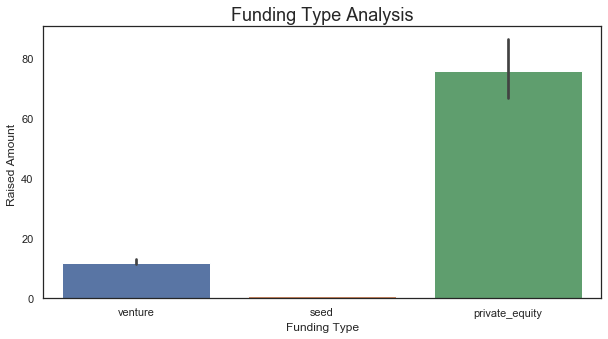

In [114]:

import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="white")
# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
barchart=sns.barplot(x='funding_round_type', y='raised_amount_mil_usd', data=master_frame)

barchart.set(xlabel='Funding Type', ylabel='Raised Amount ')
barchart.set_title('Funding Type Analysis',fontsize =18)


plt.show()


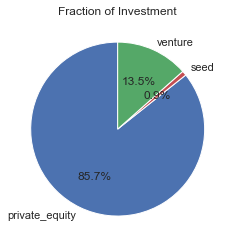

In [128]:
pieDframe =pd.DataFrame(master_frame.groupby('funding_round_type')['raised_amount_mil_usd'].mean())
pieDframe.reset_index(drop=False, inplace=True)

label = pieDframe['funding_round_type']
data = pieDframe['raised_amount_mil_usd']
colors = ['b', 'r', 'g']

plt.pie(data, labels=label, colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Fraction of Investment')
plt.show()



**A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.**

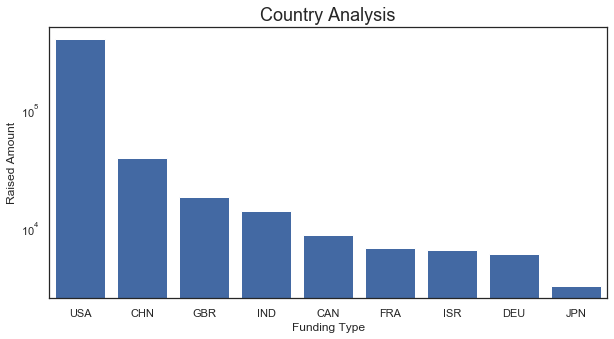

In [119]:
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_mil_usd', data=top9, estimator=np.sum,color=(0.2, 0.4, 0.7, 0.6))
#c.set_ylim(0, 100000000000)
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()

**A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type i.e venture)**

**For this plot creating a master dataframe with all the data for the top 3 sectors of the top 3 countries.**

In [120]:
master_D=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [121]:
master_D.shape

(7511, 20)

In [122]:
master_D=master_D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [123]:
master_D.shape

(7895, 20)

In [124]:
master_D=master_D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

In [125]:
master_D.shape

(8106, 20)

**Using the master_D dataframe to plot the sector wise investment count of the top 3 sectors of the top3 countries.**

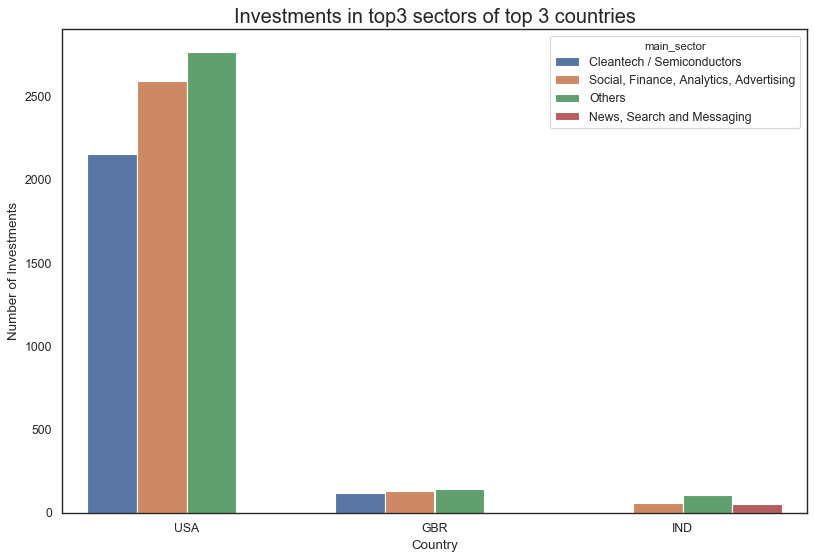

In [126]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_mil_usd', hue="main_sector", data=master_D,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()